# Sample Generation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys


from shared import hist3d_data, sample_df, frame
from landmarks import plot_landmarks
import facial_model as fm

/home/rcdilorenzo/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Save Sample


In [6]:
from shared import capture_df
from landmarks import landmarks

df_full = capture_df()
df_full['Landmarks'] = landmarks()

has_landmarks = lambda x: x.shape[0] > 0

df_full = df_full[df_full.Landmarks.apply(has_landmarks)]

INDEX_NORMAL = 8130
INDEX_ONE_EYE_VISIBLE = 8230

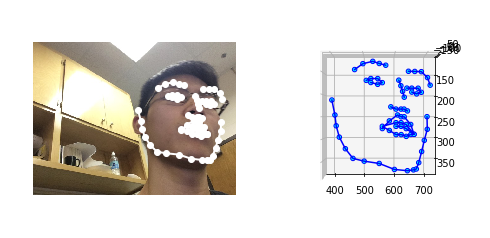

In [8]:
plot_landmarks(df_full.iloc[INDEX_NORMAL])

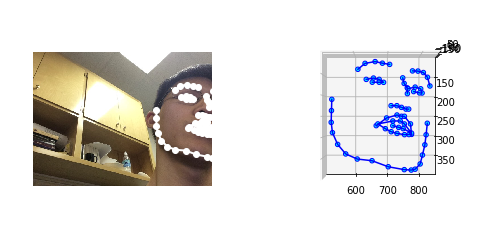

In [9]:
plot_landmarks(df_full.iloc[INDEX_ONE_EYE_VISIBLE])

In [22]:
indices = [INDEX_NORMAL, INDEX_ONE_EYE_VISIBLE]

df_full.iloc[indices].to_csv('./sample.csv')

# Save landmarks (convert to absolute index)
absolute_indices = df_full.iloc[indices].index.values.tolist()
np.save('./sample_landmarks.npy', landmarks()[absolute_indices])

# Load Sample

In [23]:
df = sample_df()
df['Landmarks'] = np.load('./sample_landmarks.npy')

print('data frame (with landmarks)', df.shape)

data frame (with landmarks) (2, 35)


In [14]:
df

,Unnamed: 0,appleRightEye.H,appleRightEye.W,appleRightEye.X,appleRightEye.Y,appleRightEye.IsValid,Frame,appleLeftEye.H,appleLeftEye.W,appleLeftEye.X,...,faceGrid.IsValid,dotInfo.DotNum,dotInfo.XPts,dotInfo.YPts,dotInfo.XCam,dotInfo.YCam,dotInfo.Time,Dataset,DeviceName,Landmarks
0,11416,0.0,0.0,0.0,0.0,0,01819/frames/00953.jpg,0.0,0.0,0.0,...,1,94,276.00000,212.00000,-15.460586,3.326979,1.043597,train,iPad Air,"[[165.0, 402.0, -97.91959], [165.0, 434.0, -90..."
1,11516,0.0,0.0,0.0,0.0,0,01819/frames/01053.jpg,0.0,0.0,0.0,...,1,104,637.02142,617.21895,-8.476373,-4.534691,1.374785,train,iPad Air,"[[158.0, 381.0, -84.75731], [162.0, 413.0, -78..."


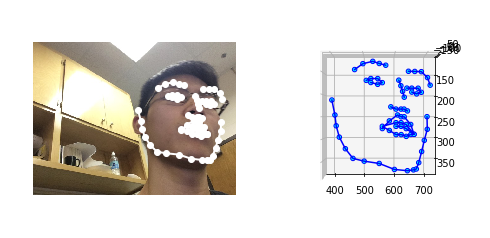

In [24]:
plot_landmarks(df.iloc[0])

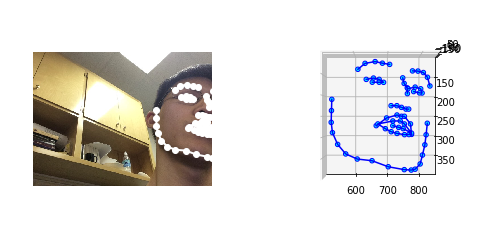

In [25]:
plot_landmarks(df.iloc[1])